In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Spotify-Songs.csv', encoding='latin1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,streams,bpm,mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,141381703,125,Major
1,LALA,Myke Towers,1,2023,3,1474,133716286,92,Major
2,vampire,Olivia Rodrigo,1,2023,6,1397,140003974,138,Major
3,Cruel Summer,Taylor Swift,1,2019,8,7858,800840817,170,Major
4,WHERE SHE GOES,Bad Bunny,1,2023,5,3133,303236322,144,Minor
...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,953,91473363,144,Major
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,1180,121871870,166,Major
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,573,73513683,92,Major
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,1320,133895612,97,Major


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   streams               953 non-null    object
 7   bpm                   953 non-null    int64 
 8   mode                  953 non-null    object
dtypes: int64(5), object(4)
memory usage: 67.1+ KB


In [12]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'in_spotify_playlists', 'streams', 'bpm', 'mode'],
      dtype='object')

In [28]:
most_popular_song = df.loc[df['streams'].idxmax()]

In [60]:
most_popular_song

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
in_spotify_playlists                                                 2877
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
bpm                                                                   110
mode                                                                Major
Name: 574, dtype: object

In [59]:
artist_streams = df.groupby('artist(s)_name')['streams'].sum().reset_index()

# Find the artist with the most streams
top_artist = artist_streams.loc[artist_streams['streams'].idxmax()]
top_artist

artist(s)_name                                    Edison Lighthouse
streams           BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: 165, dtype: object

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

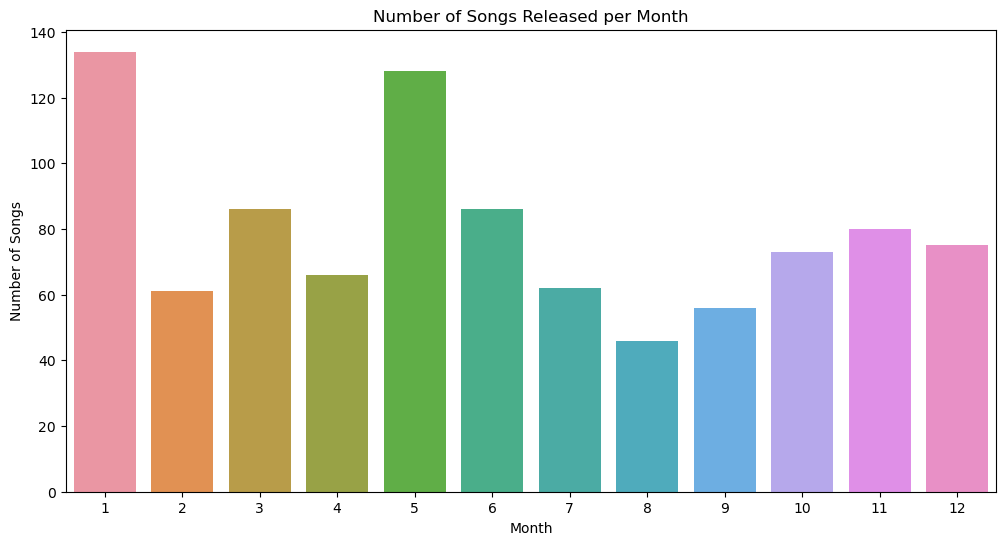

In [58]:
release_month = df.groupby('released_month')[['track_name']].count().reset_index()

release_month.columns = ['Month', 'Number of Songs']

# Sort by month for better visual representation, assuming 'Month' is numeric or properly ordered
release_month['Month'] = release_month['Month'].astype(int)  # Convert to int if necessary
release_month = release_month.sort_values('Month')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=release_month, x='Month', y='Number of Songs')

# Enhance the plot
plt.title('Number of Songs Released per Month')
plt.xlabel('Month')
plt.ylabel

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

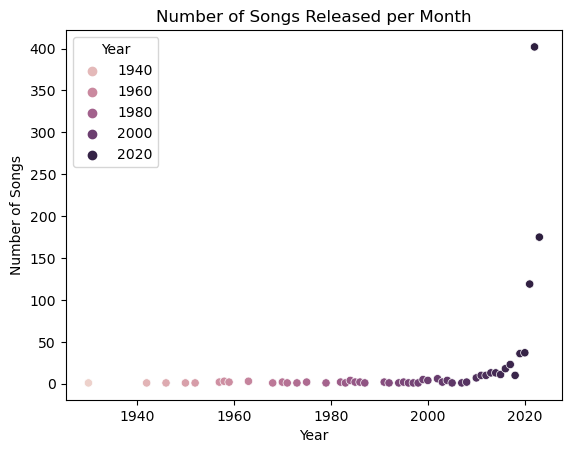

In [74]:
release_year = df.groupby('released_year')[['track_name']].count().reset_index()
release_year.columns = ['Year', 'Number of Songs']

# Sort by month for better visual representation, assuming 'Month' is numeric or properly ordered
release_year['Year'] = release_year['Year'].astype(int)  # Convert to int if necessary
release_year = release_year.sort_values('Year')

# Create a bar plot
# plt.figure(figsize=(50, 20))
sns.scatterplot(data=release_year, x='Year', y='Number of Songs', hue='Year')

# Enhance the plot
plt.title('Number of Songs Released per Month')
plt.xlabel('Year')
plt.ylabel

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

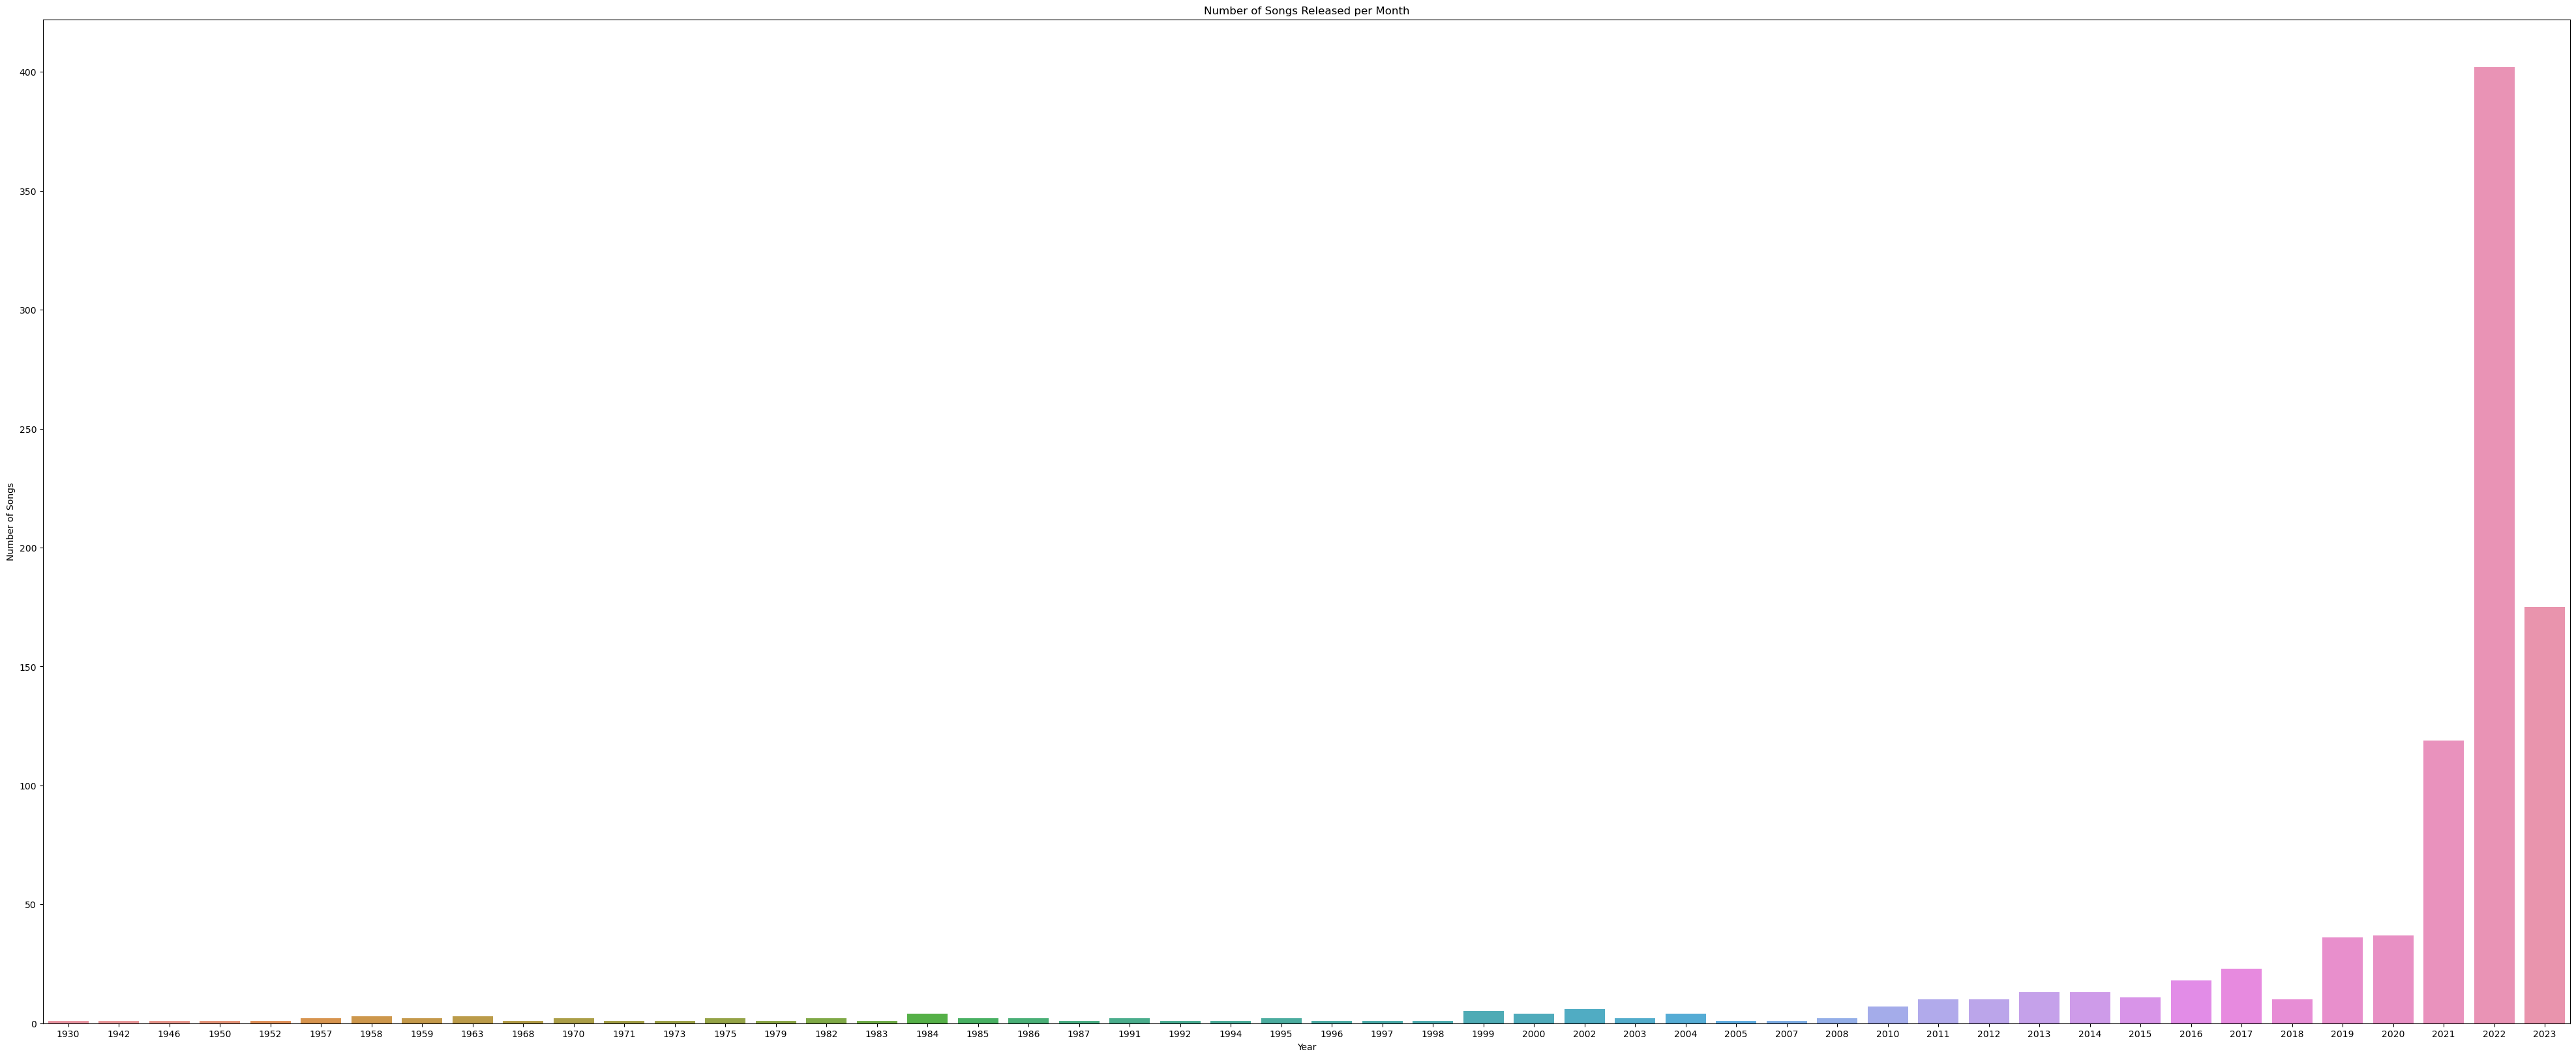

In [78]:
release_year = df.groupby('released_year')[['track_name']].count().reset_index()
release_year.columns = ['Year', 'Number of Songs']

# Sort by month for better visual representation, assuming 'Month' is numeric or properly ordered
release_year['Year'] = release_year['Year'].astype(int)  # Convert to int if necessary
release_year = release_year.sort_values('Year')

# Create a bar plot
plt.figure(figsize=(50, 20))
sns.barplot(data=release_year, x='Year', y='Number of Songs')

# Enhance the plot
plt.title('Number of Songs Released per Month')
plt.xlabel('Year')
plt.ylabel

In [83]:
df[['track_name','bpm']]

,track_name,bpm
0,Seven (feat. Latto) (Explicit Ver.),125
1,LALA,92
2,vampire,138
3,Cruel Summer,170
4,WHERE SHE GOES,144
...,...,...
948,My Mind & Me,144
949,Bigger Than The Whole Sky,166
950,A Veces (feat. Feid),92
951,En La De Ella,97


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


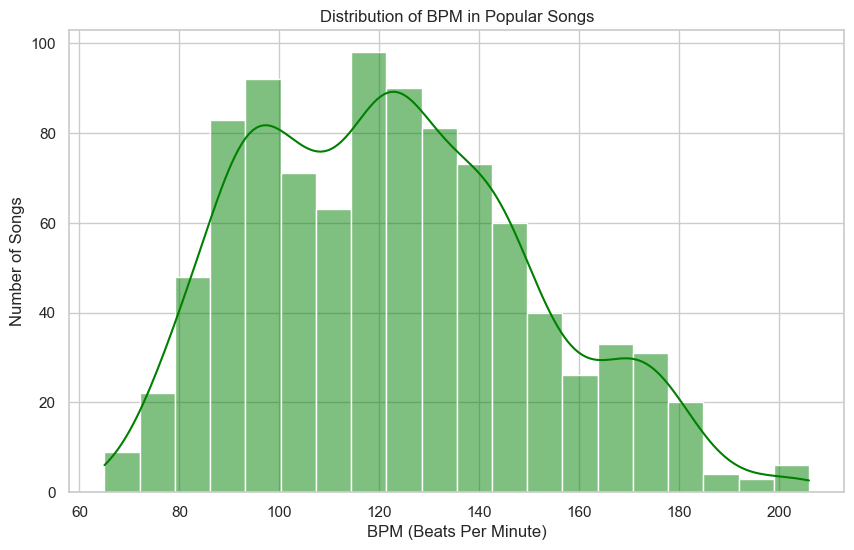

In [118]:

sns.set(style="whitegrid")

# Create a histogram of the BPM values
plt.figure(figsize=(10, 6))
sns.histplot(df['bpm'], bins=20, kde=True, color='Green')

# Add titles and labels
plt.title('Distribution of BPM in Popular Songs')
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Number of Songs')
plt.show()

In [135]:
artist_song_count = df[['artist(s)_name']].value_counts()
artist_song_count

artist(s)_name                   
Taylor Swift                         34
The Weeknd                           22
SZA                                  19
Bad Bunny                            19
Harry Styles                         17
                                     ..
Israel & Rodolffo, Ana Castela        1
Israel & Rodolffo, Mari Fernandez     1
J Balvin, Bad Bunny                   1
J Balvin, Maria Becerra               1
teto                                  1
Name: count, Length: 645, dtype: int64

In [138]:
correlation_matrix = df[['streams', 'bpm', 'duration_ms']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Title for the heatmap
plt.title('Correlation between Streams, BPM, and Duration')

# Show the plot
plt.show()

KeyError: "['duration_ms'] not in index"